<div style="text-align: left"> Presented by Marc-André Ruel and Jean-Philippe Letendre </div>

# <div style="text-align: center"> Homework # 1 </div>

# Question 1

Probabilities:
\begin{equation*}
P(Cancer+) = 1.5%
\end{equation*}

\begin{equation*}
P(Cancer-) = 98.5%
\end{equation*}

\begin{equation*}
P(T+ | Cancer+) = 87%
\end{equation*}

\begin{equation*}
P(T+ | Cancer-) = 9.6%
\end{equation*}


Bayes rule:
\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)} {P(B)}
\end{equation*}

\begin{equation*}
P(Cancer+|T+) = \frac{P(T+|C+)P(C+)} {P(T+)}
\end{equation*}

Total probability of P(T+)
\begin{equation*}
P(T+) = P(T+ | C-)P(C-) + P(T+ | C+)P(C+)
\end{equation*}

\begin{equation*}
P(T+) = 0.091*0.985+0.87*0.015
\end{equation*}
\begin{equation*}
P(T+) = 0.103
\end{equation*}

Replace with values:
\begin{equation*}
P(C+|T+) = \frac{0.87*0.015}{0.103}
\end{equation*}
\begin{equation*}
P(C+|T+) = 0.127
\end{equation*}

### Answer

The real anser would have to be **E**. Since the probability of having cancer is really low, and since the tests have a fairly hight change of being positive enven though you don't have cancer does not help the end probability of having cancer knowing the test was positive. 


___

# Question 2

### 1.
Volume for hyper cubes:

\begin{equation*}
V=c^d
\end{equation*}

### 2. 
The probability density must integrate to 1 when considering the whole region, according to the following property :

\begin{equation*}
\int p(x)dx = 1
\end{equation*}
\begin{equation*}
P(x \in region ) = \int_{region} p(x)dx
\end{equation*}

Since the probability of an event occurring outside the hypercube is non-existant, the integral of the probability density inside is 1.

### 3.



\begin{equation*}
P(WholeRegion) = P(T) = 1 = \frac{c^d}{c^d}
\end{equation*}

\begin{equation*}
P(InternalCube) = P(I) = \frac{(c-2*0.03*c)^d}{c^d}
\end{equation*}

\begin{equation*}
P(Edge) = P(E) = P(T) - P(I)
\end{equation*}

### 4.

\begin{equation*}
P(E) = 1- \frac{(c-2*0.03*c)^d}{c^d}
\end{equation*}

P(E) being the probability that x is within the edge region.

In [1]:
def pe(c,d):
    return 1-(((c-2*0.03*c)**d)/c**d)    

print("The probability that x is in the edge region is:")
print("When c=100 and d=1: ")
print(round(pe(100,1),6))
print("\nWhen c=100 and d=2: ")
print(round(pe(100,2),6))
print("\nWhen c=100 and d=3: ")
print(round(pe(100,3),6))
print("\nWhen c=100 and d=5: ")
print(round(pe(100,5),6))
print("\nWhen c=100 and d=10: ")
print(round(pe(100,10),6))
print("\nWhen c=100 and d=100: ")
print(round(pe(100,100),6))
print("\nWhen c=100 and d=1000: ")
print("Can be assumed ~=1")

The probability that x is in the edge region is:
When c=100 and d=1: 
0.06

When c=100 and d=2: 
0.1164

When c=100 and d=3: 
0.169416

When c=100 and d=5: 
0.266096

When c=100 and d=10: 
0.461385

When c=100 and d=100: 
0.997945

When c=100 and d=1000: 
Can be assumed ~=1


### 5. Conclusion

The more $\ d$ grows, the more your points will be located in the shell region of the hypercube, almost on the "surface" of your hyperobject. 

___


# Question 3

### 1. Isotropic Gaussian Density Estimation
#### a)

In the case of an isotropic gaussian, there are 2 parameters:

- $\ \mu $ : the mean of the isotropic gaussian. Equal in all directions. It has a dimension of 1; it's a scalar
- $\ \sigma^2 $ : the variance of the isotropic gaussian. Equal in all directions. It has a dimension of 1; it's a scalar

#### b)

Without derivating the maximum likelihood function, we find out that the optimal value of the parameters are calculated as a function of the data points in D :

\begin{equation} \mu = \frac{1}{n} \times \sum_{i = 0}^{n} x_i \end{equation}  

\begin{equation} \sigma^2 = \frac{1}{n} \times \sum_{i = 0}^{n} (x_i - \mu)^2 \end{equation}


#### c)

For the mean $\ \mu $ you have to compute *n* times the addition of the vectors ($\ x_{1} + x_{2} + ... + x_{n} $) containing *d* features $\ (x_{1} + x_{2}) = (x_{11}+x_{21}, x_{12} + x_{22},..., x_{1d}+x_{2d}) $, therefore $\ O(dn) $ and since $\ d $ is a scalar, $\ O(n)$.

For the variance, you have to to sum *n* times the square of a *d* x 1 matrix, since $\ x_i $ is a 1D vector and $\ mu $ a scalar :

\begin{equation*}
\ (x_{1} - \mu)^2 + (x_{2} - \mu)^2 + ... + (x_{n} - \mu)^2
\end{equation*}

Therefore, you perform *n* additions of the square of a 1-*d* vector, $\ O(dn)$, where d is a constant, so $\ O(n)$.


#### d)

\begin{equation}
\hat p_{isotrop-gaussian}(x) =  N_{\mu, \sigma^2}(x) =  \frac{1}{(2\pi)^{\frac{d}{2}}
\sigma^d} e^{\frac{-1}{2} \frac{\Vert{x-\mu} \Vert ^2}{\sigma^2}}
\end{equation} 

This is the predictor function for the Gaussian Density Estimator prediction function.

#### e)

Once the parameters have been calculated witht the functions defined in 3.1.b), the algorithmic complexity of the predictor function described in 3.1.d) is linear for the calculation of each new point x, $\ O(1) $, since there are only scalar operations to perform. 


***

### 2. Parzen Windows Density Estimation
#### a)
*Scenario1*

The training phase of Parzen Windows simply consists in storing the training data as parameters. The only hyperparameter in Parzen Windows is the variance or covariance matrix, $\ \sigma^2 $ or $\ \Sigma $. Say $\ \sigma^2$ is fixed, the model can't really learn if he has only access to a single data set because we can't even tweak the hyperparameter. If we manage to create a validation set from our data set, we could use it to optimize our hyperparameter.




### b) 
The Parzen Windows method with isotropic gaussian kernel used for a density estimation problem will have the following predictor function:

\begin{equation}
\hat p_{parzen}(x) = \frac{1}{n} \sum_{i=1}^{n} N_{X_i, \sigma}(x) = \sum_{i = 0}^{n} \frac{1}{(2\pi)^{\frac{d}{2}}
\sigma^d} e^{\frac{-1}{2} \frac{\Vert{x-X_i} \Vert ^2}{\sigma^2}}
\end{equation} 

This functions returns the density for a specific test point x.

### c)

Because $\ \mu$ and $\ \sigma^2 $ are hyperparameters, Parzen Windows method doesn't require to calculate them. The algorithmic complexity if the method is simply $\ O(dn)$ (where d is a constant), because you sum *n* times the result of the isotropic d-dimensionnal gaussian (with an input vector $\ X_i$ *1 x d*)


___

### 3. Capacity/Expressivity

#### a)

Capacity is often linked to the parameters, hyper-parameters and quality of the model fitting. In the case of parametric Gaussian, or Gaussian Density Estimation, there are no hyper-parameters to play with, and parameters are calculated via sum functions linked to the data set used. Therefore, for a given data set, you can't change the parameters except by excluding certain data from the calculation of the parameters mu and confusion matrix.

For the parzen windows with Gaussian kernel, you don't have any parameters, since it's simply the data memorized. You do have a hyperparameter, which is the sigma of the gaussian kernels generated on each training point. 

Therefore, I'd say that the Parzen Windows has a highest capacity and higher  expressivity, because that technique allows the scientist a better control of the performance of your model (by changing $\ \sigma $); he can tweak the hyper parameters in order to optimize its loss function, which is not the case for the GDE.

#### b)

Definitly the Parzen Windows. By chosing a very small variance you create isolated regions throughout the d-dimensional plane and you start memorizing noise, making it harder to generalize; basically you memorize exactly the data and don't generate a generalisable prediction model.

Because you can't change anything with GDE, you can't really overfit.

#### c)

The $\ \sigma $ parameter in the Parzen Windows method is a hyper-parameter because it is chosen by the scientist; Through iteration and optimisation of the loss function, the scientist finds the ideal sigma parameter.

In the Gaussian density estimation, the variance is within (in dimensions higher than 1) the covariance matrix. The formulae used to find that matrix depends on the data available for the model. So the scientist can't really chose a different $\ \sigma $ since its calculated by the data; to change it, he would need to get more data, or use only a part of his available data (which logically should produce a less performant prediction function, if the data isn't simple noise).

This is why $\ \sigma $ is a parameter in the GDE method, where as its a hyper-parameter in the Parzen Windows method.


___

### 4. Diagonal Gaussian Density Function

#### a)

The equation of a diagonal gaussian density is the following :

\begin{equation}
p_{diagonal-gaussian}(x) =  N_{\mu, \Sigma}(x) =  \frac{1}{(2\pi)^{\frac{d}{2}}
\sqrt{\vert\Sigma\vert}} e^{\frac{-1}{2} (x - \mu)^T\Sigma^{-1}(x - \mu)}
\end{equation} 

Where $\ \Sigma $ is a diagonal covariance matrix (*d* x *d*) of the following form:

\begin{equation}
\Sigma = \begin{bmatrix}
\sigma_{1}^2 & 0 & 0 & 0\\
0 & \sigma_{2}^2 & 0 & 0 \\
0 & 0 & ... & 0 \\
0 & 0 & 0 & \sigma_{d}^2 \\
\end{bmatrix}
\end{equation}

And $\ \mu $ is a 1 x *d* vector representing the means in the *d* dimensions : $\ [\mu_1, \mu_2, ..., \mu_d]$

$\ \Sigma $ and $\ \mu $ are the parameters of the model.

#### b) 

Let's prove that the components of a random vector followin a diagonal Gaussian distribution are independent random variables. 

Say we have a 2-dimensional situation (d = 2). Say also our covariance matrix happens to be diagonal. Our parameters will look like this:

\begin{equation}
\Sigma  = \begin{bmatrix}
\sigma_{1}^2 & 0 \\
0 & \sigma_{2}^2 \\
\end{bmatrix}
\end{equation}

\begin{equation}
\mu = 
\begin{bmatrix}
\mu_1 & \mu_2
\end{bmatrix}
\end{equation}

The gaussian density, if we expand the vector parameters, will look like this:

\begin{equation}
p_{gaussian}(x) =  N_{\mu, \Sigma}(x) =  \frac{1}{(2\pi)^{\frac{2}{2}}
\ \begin{vmatrix} 
\sigma_{1}^2 & 0 \\ 
0 & \sigma_{2}^{2} \\ 
\end{vmatrix}^{1/2}} 
e^{\frac{-1}{2} 
\begin{bmatrix} 
x_1 - \mu_1 \\ 
x_2 - \mu_2  \\ 
\end{bmatrix}^T
\begin{bmatrix}
\sigma_{1}^2 & 0 \\
0 & \sigma_{2}^2 \\
\end{bmatrix}^{-1}
\begin{bmatrix} 
x_1 - \mu_1 \\ 
x_2 - \mu_2  \\ 
\end{bmatrix}}
\end{equation} 

>We calculate matrix inversion and determinant

\begin{equation}
p_{gaussian}(x) =  N_{\mu, \Sigma}(x) =  \frac{1}{(2\pi)
\ (\sigma_1^2 \times \sigma_2^2 - 0 \times 0)^{1/2}} 
e^{\frac{-1}{2} 
\begin{bmatrix} 
x_1 - \mu_1 \\ 
x_2 - \mu_2  \\ 
\end{bmatrix}^T
\begin{bmatrix}
1/ \sigma_{1}^2 & 0 \\
0 & 1/ \sigma_{2}^2 \\
\end{bmatrix}
\begin{bmatrix} 
x_1 - \mu_1 \\ 
x_2 - \mu_2  \\ 
\end{bmatrix}}
\end{equation}

>We proceed to the matrix multiplication

\begin{equation}
p_{gaussian}(x) =  N_{\mu, \Sigma}(x) =  \frac{1}{(2\pi)
\ \sigma_1 \sigma_2 } 
e^{\frac{-1}{2} 
\begin{bmatrix} 
x_1 - \mu_1 \\ 
x_2 - \mu_2  \\ 
\end{bmatrix}^T
\begin{bmatrix} 
1/ \sigma_{1}^2 (x_1 - \mu_1) \\ 
1/ \sigma_{2}^2 (x_2 - \mu_2)  \\ 
\end{bmatrix}}
\end{equation}

>We obtain a single line in the exponent

\begin{equation}
p_{gaussian}(x) =  N_{\mu, \Sigma}(x) =  \frac{1}{(2\pi)
\sigma_1 \sigma_2 } 
e^{\frac{-1}{2\sigma_1^2}(x_1 - \mu_1)^2 - 
\frac{1}{2\sigma_2^2}(x_2 - \mu_2)^2}
\end{equation}

>We can then separate our expression in two, each depending on a single dimension:

\begin{equation}
p_{gaussian}(x) =  N_{\mu, \Sigma}(x) =  \frac{1}{\sqrt{(2\pi)}
\sigma_1} 
e^{\frac{-1}{2\sigma_1^2}(x_1 - \mu_1)^2}
\times
\frac{1}{\sqrt{(2\pi)}
\sigma_2} 
e^{\frac{-1}{2\sigma_2^2}(x_2 - \mu_2)^2}
\end{equation}

As we can see with the final expression, the gaussian function is simply a combination of 2 other gaussian function, with $\ \mu_1 $, $\ \sigma_1^2 $ and $\ \mu_2 $, $\ \sigma_2^2 $ as parameters respectively.

We can extrapolate this to other multivariate gaussians, with $\ d \geq 2$, and say that a gaussian having a *d* x *d* diagonal covariance matrix is in fact a combination of multiple gaussian functions. Therefore, its components are independant random variables.

\begin{equation}
p_{diagonal-gaussian}(x) =  N_{\mu, \sigma^2}(x) =  \prod_{i=1}^{d} \frac{1}{\sqrt{(2\pi)}
\sigma_i} 
e^{\frac{-1}{2\sigma_i^2}(x - \mu_i)^2}
\end{equation}

#### c)

We want to find a predictor function which will be able to minimize our average loss on a training set.

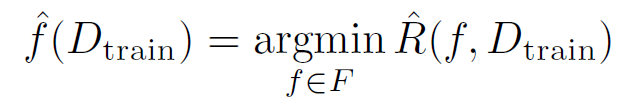

Using the expression we found in the last question, we define our empirical risk :

\begin{equation}
\hat R(p, D) = \frac{1}{\vert D \vert} \sum_{j = 1}^{n} L(p(x_{ij}; \mu_i, \sigma_i^2) = \frac{1}{\vert D \vert} \sum_{j=1}^{n} -log(\prod_{i=1}^{d}   \frac{1}{\sqrt{(2\pi)}
\sigma_i} 
e^{\frac{-1}{2\sigma_i^2}(x_{ij} - \mu_i)^2})
\end{equation}

Where *d* is the dimension of our gaussian and *n* the number of samples. We used the negative log likelihood. With the -log we can transform the production into a summation.

\begin{equation}
\hat f(D_{train}) = \hat R(p, D_{train}) = \frac{1}{n} \sum_{j=1}^{n} \sum_{i=1}^{d} \frac{1}{2}log(2\pi) + log(\sigma_i) + 
\frac{1}{2\sigma_i^2}(x_{ij} - \mu_i)^2
\end{equation}

This expression corresponds to the empirical risk minimization on the training D.

#### d)
Let's say $\ \mu$ equals $\ \theta_1$ and $\ \sigma^2$ equals $\ \theta_2$. We start with the following expression:

\begin{equation}
\hat f(D_{train}) = \hat R(p, D_{train}) = \frac{1}{n} \sum_{j=1}^{n} \sum_{i=1}^{d} \frac{1}{2}log(2\pi) + \frac{1}{2}log(\theta_2) + 
\frac{1}{2\theta_2^2}(x_{ij} - \theta_1)^2
\end{equation}

To obtain the parameters, we simply have the partially derivate our ERM function above according to $\ \mu$ or $\ \sigma^2$ and then set the partial derivates to 0.


\begin{equation}
\frac{dR}{d\theta_1} =  \frac{1}{n} \theta_{j=1}^{n} \sum_{i=1}^{d} \frac{1}{2\theta_2}2(x_{ij} - \theta_1) (-1)
\end{equation}

Set to 0 and solve:

\begin{equation}
0 =  \frac{1}{n} \sum_{j=1}^{n} \sum_{i=1}^{d} \frac{-1}{theta_2}(x_{ij} - \theta_1)
\end{equation}

\begin{equation}
0 =  \sum_{j=1}^{n} \sum_{i=1}^{d} \frac{-1}{theta_2}(x_{ij} - \theta_1)
\end{equation}

Because we know that $\ \mu $ and $\ \sigma^2 $ will change in each dimension d of the gaussian but each dimension is independant from each other, we remove temporarily the dimension summation; we can therefore also remove our $\ \theta_2$ factor :

\begin{equation}
\text{for each i in d : } 0 =  \sum_{j=1}^{n} (x_{ij} - \theta_1)
\end{equation}

\begin{equation}
\text{for each i in d : } 0 =  \sum_{j=1}^{n} (x_{ij}) - n\theta_1
\end{equation}

\begin{equation}
\text{for each i in d : } n\theta_1 =  \sum_{j=1}^{n} (x_{ij}) 
\end{equation}

\begin{equation}
\text{for each i in d : } \mu_i =  \frac{1}{n}\sum_{j=1}^{n} (x_{ij}) 
\end{equation}

And we get the optimal $\ \mu$ parameter. 
For $\ \sigma^2$:

\begin{equation}
\frac{dR}{d\theta_2} =  \frac{1}{n} \sum_{j=1}^{n} \sum_{i=1}^{d} (\frac{-1}{2\theta_2^2}2(x_{ij} - \theta_1)^2 + \frac{1}{2\theta_2})
\end{equation}

Set to 0 and solve:

\begin{equation}
0 =  \frac{1}{n} \sum_{j=1}^{n} \sum_{i=1}^{d} (\frac{-1}{2\theta_2^2}2(x_{ij} - \theta_1)^2) + \frac{1}{n} \times n \times \frac{1}{2\theta_2}
\end{equation}

\begin{equation}
\frac{-1}{2\theta_2} = \frac{1}{n} \sum_{j=1}^{n} \sum_{i=1}^{d} \frac{-1}{2\theta_2^2}(x_{ij} - \theta_1)^2
\end{equation}

\begin{equation}
n = \sum_{j=1}^{n} \sum_{i=1}^{d} \frac{1}{\theta_2}(x_{ij} - \theta_1)^2
\end{equation}

Because we know that $\ \mu $ and $\ \sigma^2 $ will change in each dimension d of the gaussian but each dimension is independant from each other, we remove temporarily the dimension summation; we can therefore also remove our $\ \theta_2$ factor :

\begin{equation}
\text{for each i in d : } n\theta_2 = \sum_{j=1}^{n} (x_{ij} - \theta_1)^2
\end{equation}

\begin{equation}
\text{for each i in d : } \sigma_i^2 = \frac{1}{n}\sum_{j=1}^{n} (x_{ij} - \mu_i)^2
\end{equation}

# Question4

In [2]:
import numpy as np
import random
import pylab
import time
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# load iris
iris = np.loadtxt('iris.txt')
data = iris

# Number of classes
n_classes = 3
# Size of training set
n_train = 100

# The columns (features) on which to train our model
# For gridplot to work, len(train_cols) should be 2
train_cols = [0]
# The index of the column containing the labels
target_ind = [data.shape[1] - 1]

# Comment to have random (non-deterministic) results 
random.seed(3395)
# Randomly choose indexes for the train and test dataset
inds = list(range(data.shape[0]))
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]

# Split the data into both sets
train_set = data[train_inds,:]
train_set = train_set[:,train_cols + target_ind]
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# Separate the test set into inputs and labels
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1].astype('int32')
train_inputs = train_set[:, :-1]
train_labels = train_set[:, -1].astype('int32')

### 1. Implement Diagonal Gaussian


\begin{equation}
p(x) =  N_{\mu, \Sigma}(x) =  \frac{1}{(2\pi)^{\frac{d}{2}}
\sqrt{\vert\Sigma\vert}} e^{\frac{-1}{2} (x - \mu)^T\Sigma^{-1}(x - \mu)}
\end{equation} 

In [3]:
class gaussianDensityEstimator:
    # def __init__(self):
        
    def train(self, trainInputs): # no need for the labels since this is a density estimator
        self.d = trainInputs.shape[1] # Dimension
        self.meanVector = np.mean(trainInputs, axis=0).reshape(self.d,1)
         # The variables are in the columns and the exemples in the rows
        
        if self.d == 1  :
            self.var = np.cov(trainInputs, rowvar=False)
             
        else :
            self.covMatrix = np.cov(trainInputs, rowvar=False)
            for x in range(0, self.covMatrix.shape[0]): # Make sure we only have a diagonal Gaus.
                for y in range(0, self.covMatrix.shape[1]):
                    if x!=y:
                        self.covMatrix.itemset(x,y,0)
            self.covDeterminant = np.linalg.det(self.covMatrix)
        
        
    def predict(self, x):
        d = self.d
        
        if (d == 1): # univariant
            left = 1/ (self.var * (2*np.pi)**(0.5))
            right = np.exp( -((x - self.meanVector)**2) / (2*self.var**2) )
        
        else: # multivariant
            inv = np.linalg.inv(self.covMatrix)
            left = 1 / ( ((2*np.pi)**(d/2))*(self.covDeterminant**0.5) )
            right = np.exp(-0.5 * np.transpose(x.T - self.meanVector).dot(inv).dot(x.T - self.meanVector))
        
        
        return np.log((left * right))[0][0] # returns the lost function (or the -log(p(x)))
 



In [4]:
gauss = gaussianDensityEstimator()

t1 = time.clock()

gauss.train(train_inputs)
t2 = time.clock()
print('It took ', t2-t1, ' seconds to train on ', train_inputs.shape[0],' train set examples')

result = gauss.predict(test_inputs[:1])
print(result.shape)
print("Result: ", result)


It took  0.3511576442186276  seconds to train on  100  train set examples
()
Result:  -4.896511677649869


### 2. Implement Parzen density estimator
This is the Parzen density estimator with an isotropic Gaussian kernal formula (extracted from the slides):

\begin{equation}
f(x) = \hat p(x) = \frac{1}{n} \sum_{i=1}^{n} K(X_i ; x))
\end{equation} 

But since we want the kernal to work on *d* dimensions:
\begin{equation}
\hat p_{isotrop-gaussian}(x) =  N_{\mu, \sigma^2}(x) =  \frac{1}{(2\pi)^{\frac{d}{2}}
\sigma^d} e^{\frac{-1}{2} \frac{d(X_i ,x) ^2}{\sigma^2}}
\end{equation} 

In [5]:

## Training is simply the action of remembering the trainin set.

# Calculates the Minkowski distance between a vector x and a matrix Y
def minkowski_mat(x,Y,p=2):
    return (np.sum((np.abs(x-Y))**p,axis=1))**(1.0/p)

# Can take a matrice in input and will output
# de K(x) for every line of the matrix
def isoGaussKernal(x, Y, va, d):
    dist = minkowski_mat(x, Y)
    left = 1 / ( ((2*np.pi)**(d/2)) * va**d )
    right = np.exp( -0.5 * ( (dist**2)/(va**2) ))
    return left * right

class parsienn:
    def __init__(self, kernal, va):
        self.kernal = kernal
        self.va = va
        
    def train(self, train_inputs):
        self.train_inputs = train_inputs
        self.n_size = train_inputs.shape[1]
        
    def predict(self, x):
        K_vector = self.kernal(x, self.train_inputs, self.va, self.n_size)
        return np.log((1/self.n_size) * np.sum(K_vector))


In [6]:
model = parsienn(isoGaussKernal, 0.001)

t1 = time.clock()
model.train(train_inputs)
t2 = time.clock()
print('It took ', t2-t1, ' seconds to train on ', train_inputs.shape[0],' train set examples')

result = model.predict(test_inputs[:1])
print("Result: ", result)

It took  5.3077420266167685e-05  seconds to train on  100  train set examples
Result:  5.988816745777465


### 3. 1D densities

#### a) 
The 50 first data sets from the iris document have a predicting lablel of class 1. We shall take them for the next section.

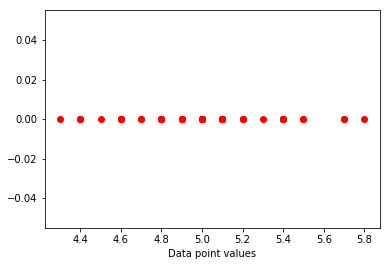

In [7]:
class1 = iris[:50,:1] 
plt.plot(class1, np.zeros_like(class1), 'ro')
plt.xlabel("Data point values")
plt.show()
# print(class1)


#### b)

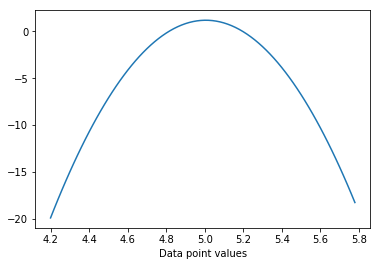

In [8]:
gauss = gaussianDensityEstimator()
gauss.train(class1)
t2 = np.arange(4.2, 5.8, 0.02)
densities = []
for dataPoint in t2:
    densities.append(gauss.predict(dataPoint))

plt.plot(t2, np.array(densities))
plt.xlabel("Data point values")
plt.show()


#### c)

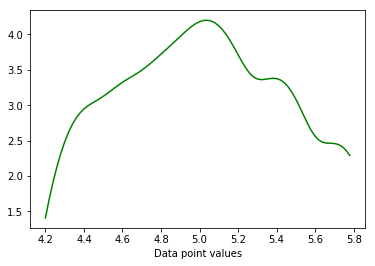

In [9]:
par = parsienn(isoGaussKernal, 0.1)
par.train(class1)

densitiesSmall = []
for dataPoint in t2:
    densitiesSmall.append(par.predict(dataPoint))

plt.plot(t2, np.array(densitiesSmall), 'g')
plt.xlabel("Data point values")
plt.show()

#### d)

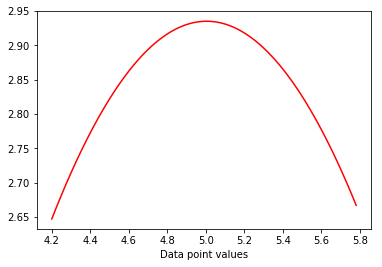

In [10]:
par = parsienn(isoGaussKernal, 1)
par.train(class1)

densitiesBig = []
for dataPoint in t2:
    densitiesBig.append(par.predict(dataPoint))

plt.plot(t2, np.array(densitiesBig), 'r')
plt.xlabel("Data point values")
plt.show()

#### e)

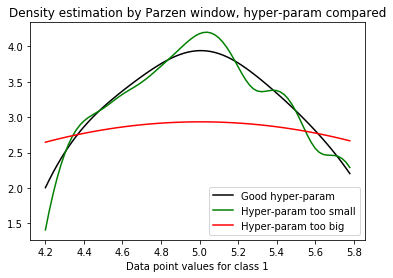

In [11]:
par = parsienn(isoGaussKernal, 0.2)
par.train(class1)

densities = []
for dataPoint in t2:
    densities.append(par.predict(dataPoint))

plt.plot(t2, np.array(densities), 'k', label="Good hyper-param")
plt.plot(t2, np.array(densitiesSmall), 'g', label="Hyper-param too small")
plt.plot(t2, np.array(densitiesBig), 'r', label="Hyper-param too big")
plt.xlabel("Data point values for class 1")
plt.legend()
plt.title("Density estimation by Parzen window, hyper-param compared")
plt.show()

* f) 
To have an expressive curve, we have to minimise the hyper-parameter, but to make sure we don't take into consideration too much noise we don't want it to overfit our data by having it too small. On the other hand, if we look at the red line, it's averaging out too mutch neer the middle and we are loosing precision. The objective is to have a very expresive smooth curve: neer the green line but averaging out the noise. 

### 4. 2D densities
#### a)

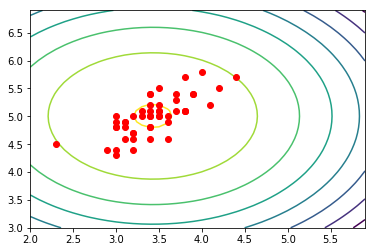

In [12]:
class1_2d = iris[:50,:2]
X = np.arange(3, 7, 0.1)
Y = np.arange(2, 6, 0.1)

gauss = gaussianDensityEstimator()
gauss.train(class1_2d)

t3 = np.zeros((X.size,Y.size))
for x in range(0, X.size):
    for y in range(0, Y.size):
        t3.itemset(x,y,gauss.predict(np.array([[X[x],Y[y]]])))
    
fig, ax = plt.subplots()
ax.contour(Y,X, t3)
plt.plot(class1_2d[:,1:2], class1_2d[:,:1], 'ro')
plt.show()

#### b)

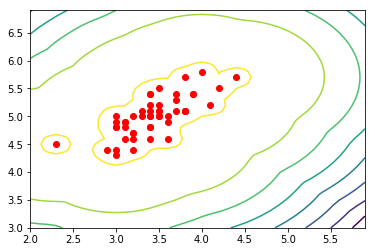

In [13]:
par = parsienn(isoGaussKernal, 0.08)
par.train(class1_2d)

t4 = np.zeros((X.size,Y.size))
for x in range(0, X.size):
    for y in range(0, Y.size):
        t4.itemset(x,y,par.predict(np.array([[X[x],Y[y]]])))
        
fig, ax = plt.subplots()
ax.contour(Y,X, t4)
plt.plot(class1_2d[:,1:2], class1_2d[:,:1], 'ro')
plt.show()

#### c)

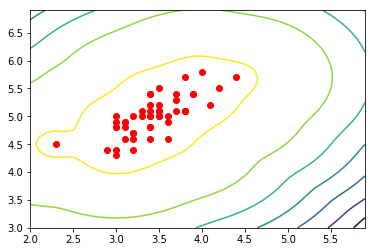

In [14]:
par = parsienn(isoGaussKernal, 0.2)
par.train(class1_2d)

t4 = np.zeros((X.size,Y.size))
for x in range(0, X.size):
    for y in range(0, Y.size):
        t4.itemset(x,y,par.predict(np.array([[X[x],Y[y]]])))
        
fig, ax = plt.subplots()
ax.contour(Y,X, t4)
plt.plot(class1_2d[:,1:2], class1_2d[:,:1], 'ro')
plt.show()

#### d)

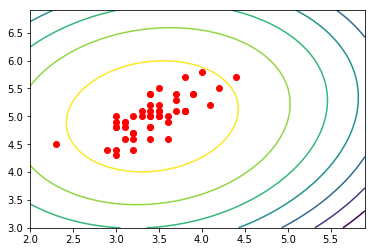

In [15]:
par = parsienn(isoGaussKernal, 0.8)
par.train(class1_2d)

t4 = np.zeros((X.size,Y.size))
for x in range(0, X.size):
    for y in range(0, Y.size):
        t4.itemset(x,y,par.predict(np.array([[X[x],Y[y]]])))
        
fig, ax = plt.subplots()
ax.contour(Y,X, t4)
plt.plot(class1_2d[:,1:2], class1_2d[:,:1], 'ro')
plt.show()

#### e) 
Just like in the previous number where we had to find the best hyper-parameter in 1D, in this case we want to do the same thing. Starting from the 1D example, we have a good starting point to know which hyper-parameter we can investigate. If we look closely to the figure **b)**, we can see there's actually 2 distinc maximums for the class. This is not really what we want since it's making a special case out of the isolated data and is then over fitting. In the image **c)** all the data is part of one big maximum but still keeps the general shape of the distribution contrairy to figure **d)** where all particularities of the dataset is lost to one central oval. 